In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import time


In [2]:
class_list = {}

for year in range(2001, 2019):
    if(year==2011):
        continue
    with open(f"{year} STOP Summary.xlsx", "rb") as wrkbk:
        for i in range(7):
            data = pd.read_excel(wrkbk, sheet_name=f'Class {i+1} Formatted')
            if i+1 not in class_list.keys():
                class_list[i+1] = {}
            class_list[(i+1)][year] = list(data.columns)
    

In [3]:
for class_num in class_list.keys():
    print(f"Class {class_num}")
    for year in range(2001, 2019):
        if year==2011:
            continue
        print(f"Year {year}")
        pprint(class_list[class_num][year])


Class 1
Year 2001
['Fair Name',
 'Beginning Resources 1/1/2001',
 'State Allocation',
 'Other',
 'Admissions to Grounds',
 'Industrial and Commercial Space',
 'Concessions',
 'Exhibits',
 'Horse Show',
 'Horse Racing (Fairtime Pari-Mutuel)',
 'Horse Racing (Satellite Wagering)',
 'Fair Attractions',
 'Miscellaneous Fair',
 'Miscellaneous Non-Fair ',
 'Interim Revenue',
 'Prior Year Revenue Adjustment',
 'Other Operating Revenue',
 'Administration',
 'Maintenance & General Operations',
 'Publicity',
 'Attendance Operations',
 'Miscellaneous Fair.1',
 'Miscellaneous Non-Fair Programs',
 'Premiums ',
 'Exhibits.1',
 'Horse Show.1',
 'Horse Racing (Fairtime Pari-Mutuel).1',
 'Horse Racing (Satellite Wagering).1',
 'Fair Entertainment Expense',
 'Interim Entertainment Expense',
 'Equipment Funded by Fair',
 'Prior Year Expense Adjustment',
 'Cash (Over/Under)',
 'Capital Expenditures Funded by Fair',
 'Other Addition/(Reduction) in Resources',
 '    Restricted Cash',
 '    Available Cash',


In [4]:
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

pprint(Diff([1,2],[1]))
pprint(Diff([1],[1,2]))
pprint(Diff([2,1],[1]))

[2]
[2]
[2]


In [5]:
for year in range(2001, 2019):
    if year==2011:
        continue
    if year==2001:
        print("Original ",end="")
        pprint(class_list[1][year])
    print(f"Diff for year {year}")
    pprint(Diff(class_list[1][year],class_list[1][2001]))

Original ['Fair Name',
 'Beginning Resources 1/1/2001',
 'State Allocation',
 'Other',
 'Admissions to Grounds',
 'Industrial and Commercial Space',
 'Concessions',
 'Exhibits',
 'Horse Show',
 'Horse Racing (Fairtime Pari-Mutuel)',
 'Horse Racing (Satellite Wagering)',
 'Fair Attractions',
 'Miscellaneous Fair',
 'Miscellaneous Non-Fair ',
 'Interim Revenue',
 'Prior Year Revenue Adjustment',
 'Other Operating Revenue',
 'Administration',
 'Maintenance & General Operations',
 'Publicity',
 'Attendance Operations',
 'Miscellaneous Fair.1',
 'Miscellaneous Non-Fair Programs',
 'Premiums ',
 'Exhibits.1',
 'Horse Show.1',
 'Horse Racing (Fairtime Pari-Mutuel).1',
 'Horse Racing (Satellite Wagering).1',
 'Fair Entertainment Expense',
 'Interim Entertainment Expense',
 'Equipment Funded by Fair',
 'Prior Year Expense Adjustment',
 'Cash (Over/Under)',
 'Capital Expenditures Funded by Fair',
 'Other Addition/(Reduction) in Resources',
 '    Restricted Cash',
 '    Available Cash',
 'Account

[None]


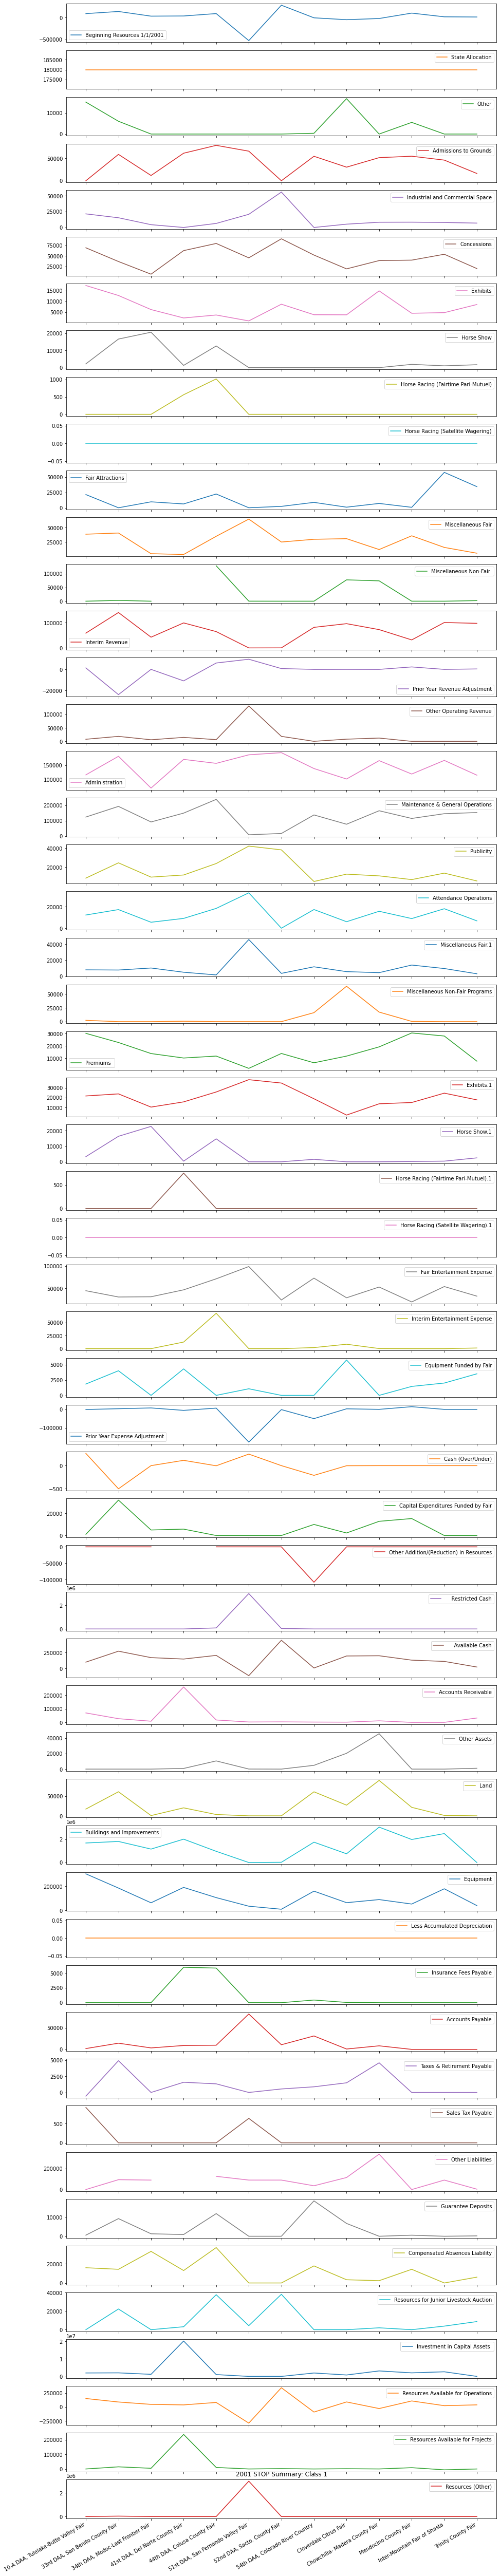

In [6]:
wrkbks=[open(f"20{i:02} STOP Summary.xlsx", "rb") for i in range(1, 19) if i!=11] 
for i in range(1):
    data = pd.read_excel(wrkbks[i], sheet_name=f'Class {i+1} Formatted')
    print(data.index.names)
    axes = data.plot(subplots=True, figsize=(15,100))
    plt.setp(axes, xticks=range(len(data)),xticklabels=data['Fair Name'])
    plt.title(f"2001 STOP Summary: Class {i+1}")

            

In [49]:
classes = {}
class_names = ['1','2','3','4','5','6','7','3+','4+']

In [50]:
for i in range(9):
    try:
        data = pd.read_excel(wrkbks[-1], sheet_name=f'Class {class_names[i]} Formatted')
    except:
        print(f"Probably Class {class_names[i]} doesn't exist this year.") 
        continue
    data["Year"] = 2018
    multi = data.set_index(['Fair Name', 'Year']).sort_index()
    classes[f'Class {class_names[i]}'] = multi

In [51]:
offset=0
for i in range(0,17):
    for cls_num in class_names:
        if(i==12):
            offset=1
        try:
            data = pd.read_excel(wrkbks[i], sheet_name=f'Class {cls_num} Formatted')
        except:
            print(f"Probably Class {cls_num} doesn't exist this year 20{i+1:02}.") 
            continue
        data["Year"] = int(f"20{i+1:02}")
        multi = data.set_index(['Fair Name', 'Year']).sort_index()
        classes[f'Class {cls_num}'] = pd.concat([classes[f'Class {cls_num}'], multi])
print(classes)
print(classes['Class 1'])

Probably Class 3+ doesn't exist this year 2001.
Probably Class 4+ doesn't exist this year 2001.
Probably Class 3+ doesn't exist this year 2002.
Probably Class 4+ doesn't exist this year 2002.
Probably Class 3+ doesn't exist this year 2003.
Probably Class 4+ doesn't exist this year 2003.
Probably Class 3+ doesn't exist this year 2004.
Probably Class 4+ doesn't exist this year 2004.
Probably Class 3+ doesn't exist this year 2005.
Probably Class 4+ doesn't exist this year 2005.
Probably Class 3+ doesn't exist this year 2006.
Probably Class 4+ doesn't exist this year 2006.
Probably Class 3+ doesn't exist this year 2007.
Probably Class 4+ doesn't exist this year 2007.
Probably Class 3+ doesn't exist this year 2008.
Probably Class 4+ doesn't exist this year 2008.
{'Class 1':                                                          Unrestricted - Available for Operations  \
Fair Name                                          Year                                            
10-A DAA, Tulelake-B

In [52]:
for key in classes.keys():
    classes[key].sort_index( inplace=True)
    print(key,end="\n\n==================\n\n")
    print(classes[key]['Investment in Capital Assets'],end="\n\n==================\n\n")

Class 1


Fair Name                             Year
10-A DAA, Tulelake-Butte Valley Fair  2001           NaN
                                      2002           NaN
                                      2003           NaN
                                      2004    1084639.00
                                      2005     906528.00
                                                 ...    
Trinity County Fair                   2014     988988.00
                                      2015     911236.55
                                      2016     976856.00
                                      2017     928161.00
                                      2018     928161.00
Name: Investment in Capital Assets, Length: 220, dtype: float64


Class 2


Fair Name                                    Year
10th DAA, Siskiyou Golden Fair               2001          NaN
                                             2002          NaN
                                             2003          NaN
     

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabe

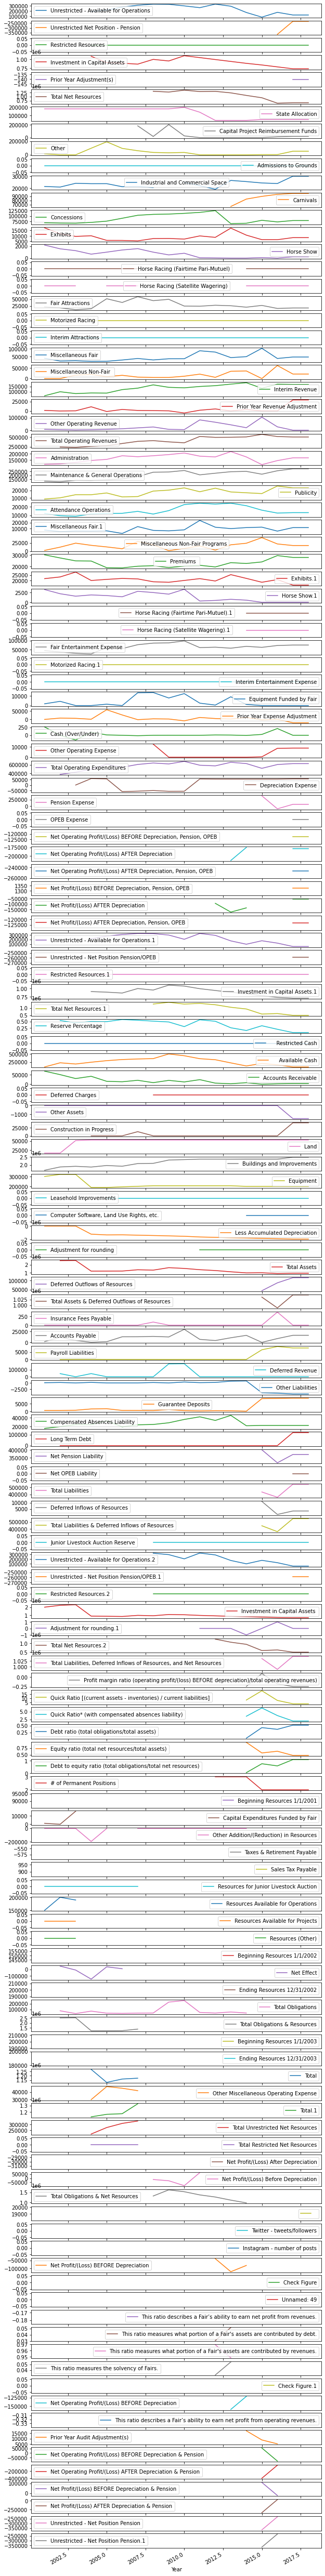

In [60]:
classes["Class 1"].xs('10-A DAA, Tulelake-Butte Valley Fair').plot(subplots=True, figsize=(10, 200))


#.plot('Investment in Capital Assets', use_index=True)

In [8]:
class_one = class_list[1]
for year in class_one.keys():
    if "Other Addition/(Reduction) in Resources" in class_one[year]:
        print(f"{year} It's there!")
    else:
        print(f"{year} It's not there.")

2001 It's there!
2002 It's there!
2003 It's there!
2004 It's there!
2005 It's there!
2006 It's not there.
2007 It's there!
2008 It's there!
2009 It's there!
2010 It's there!
2012 It's there!
2013 It's there!
2014 It's there!
2015 It's there!
2016 It's not there.
2017 It's not there.
2018 It's not there.
